In [45]:
import numpy as np
import random

In [46]:
def EstimateCorrespondences(pointCloudX,pointCloudY,translation,rotation,dMax):
    correspondences =[]
    for index in range (len(pointCloudX)):
        yTransformation = (rotation.dot(pointCloudX[index]) + translation)
        shiftedY = (pointCloudY - yTransformation)
        normalizedY = np.linalg.norm(shiftedY,axis=1)
        indexMin = np.argmin(normalizedY)
        if(normalizedY[indexMin]<dMax):
            correspondences.append((index,indexMin))
    return correspondences

In [47]:
def ComputeOptimalPointRegistration(pointCloudX, pointCloudY, correspondences):
    correspondingX = []
    correspondingY = []
    size = len(correspondences)

    for pair in correspondences:
        correspondingX.append(pointCloudX[pair[0]])
        correspondingY.append(pointCloudY[pair[1]])
    
    centroidX = np.mean(correspondingX , axis=0)
    centroidY = np.mean(correspondingY, axis=0)

    deviationsX = correspondingX - centroidX
    deviationsY = correspondingY - centroidY

    crossCovarience = (deviationsY.T.dot(deviationsX)) / size

    U, E, Vt = np.linalg.svd(crossCovarience)

    rotation = U.dot(Vt)
    
    translation = centroidY.T - rotation.dot(centroidX.T)

    return rotation, translation

In [48]:
def ICP(pointCloudX, pointCloudY, t_0, R_0, dMax, iterations):
    t = t_0
    R = R_0

    for i in range(iterations):
        correspondences = EstimateCorrespondences(pointCloudX, pointCloudY, t, R, dMax)
        R, t = ComputeOptimalPointRegistration(pointCloudX, pointCloudY, correspondences)

    return (correspondences, R, t)

In [49]:
pointCloudX = np.loadtxt("pclX.txt")
pointCloudY = np.loadtxt("pclY.txt")

initial_t = np.array([0,0,0])
initial_R = np.array([[1,0,0],[0,1,0],[0,0,1]])
dMax = 0.25
num_iterations = 30


C, R, t = ICP(pointCloudX, pointCloudY, initial_t, initial_R, dMax, num_iterations)


iterations:1
iterations:2
iterations:3
iterations:4
iterations:5
iterations:6
iterations:7
iterations:8
iterations:9
iterations:10
iterations:11
iterations:12
iterations:13
iterations:14
iterations:15
iterations:16
iterations:17
iterations:18
iterations:19
iterations:20
iterations:21
iterations:22
iterations:23
iterations:24
iterations:25
iterations:26
iterations:27
iterations:28
iterations:29
iterations:30


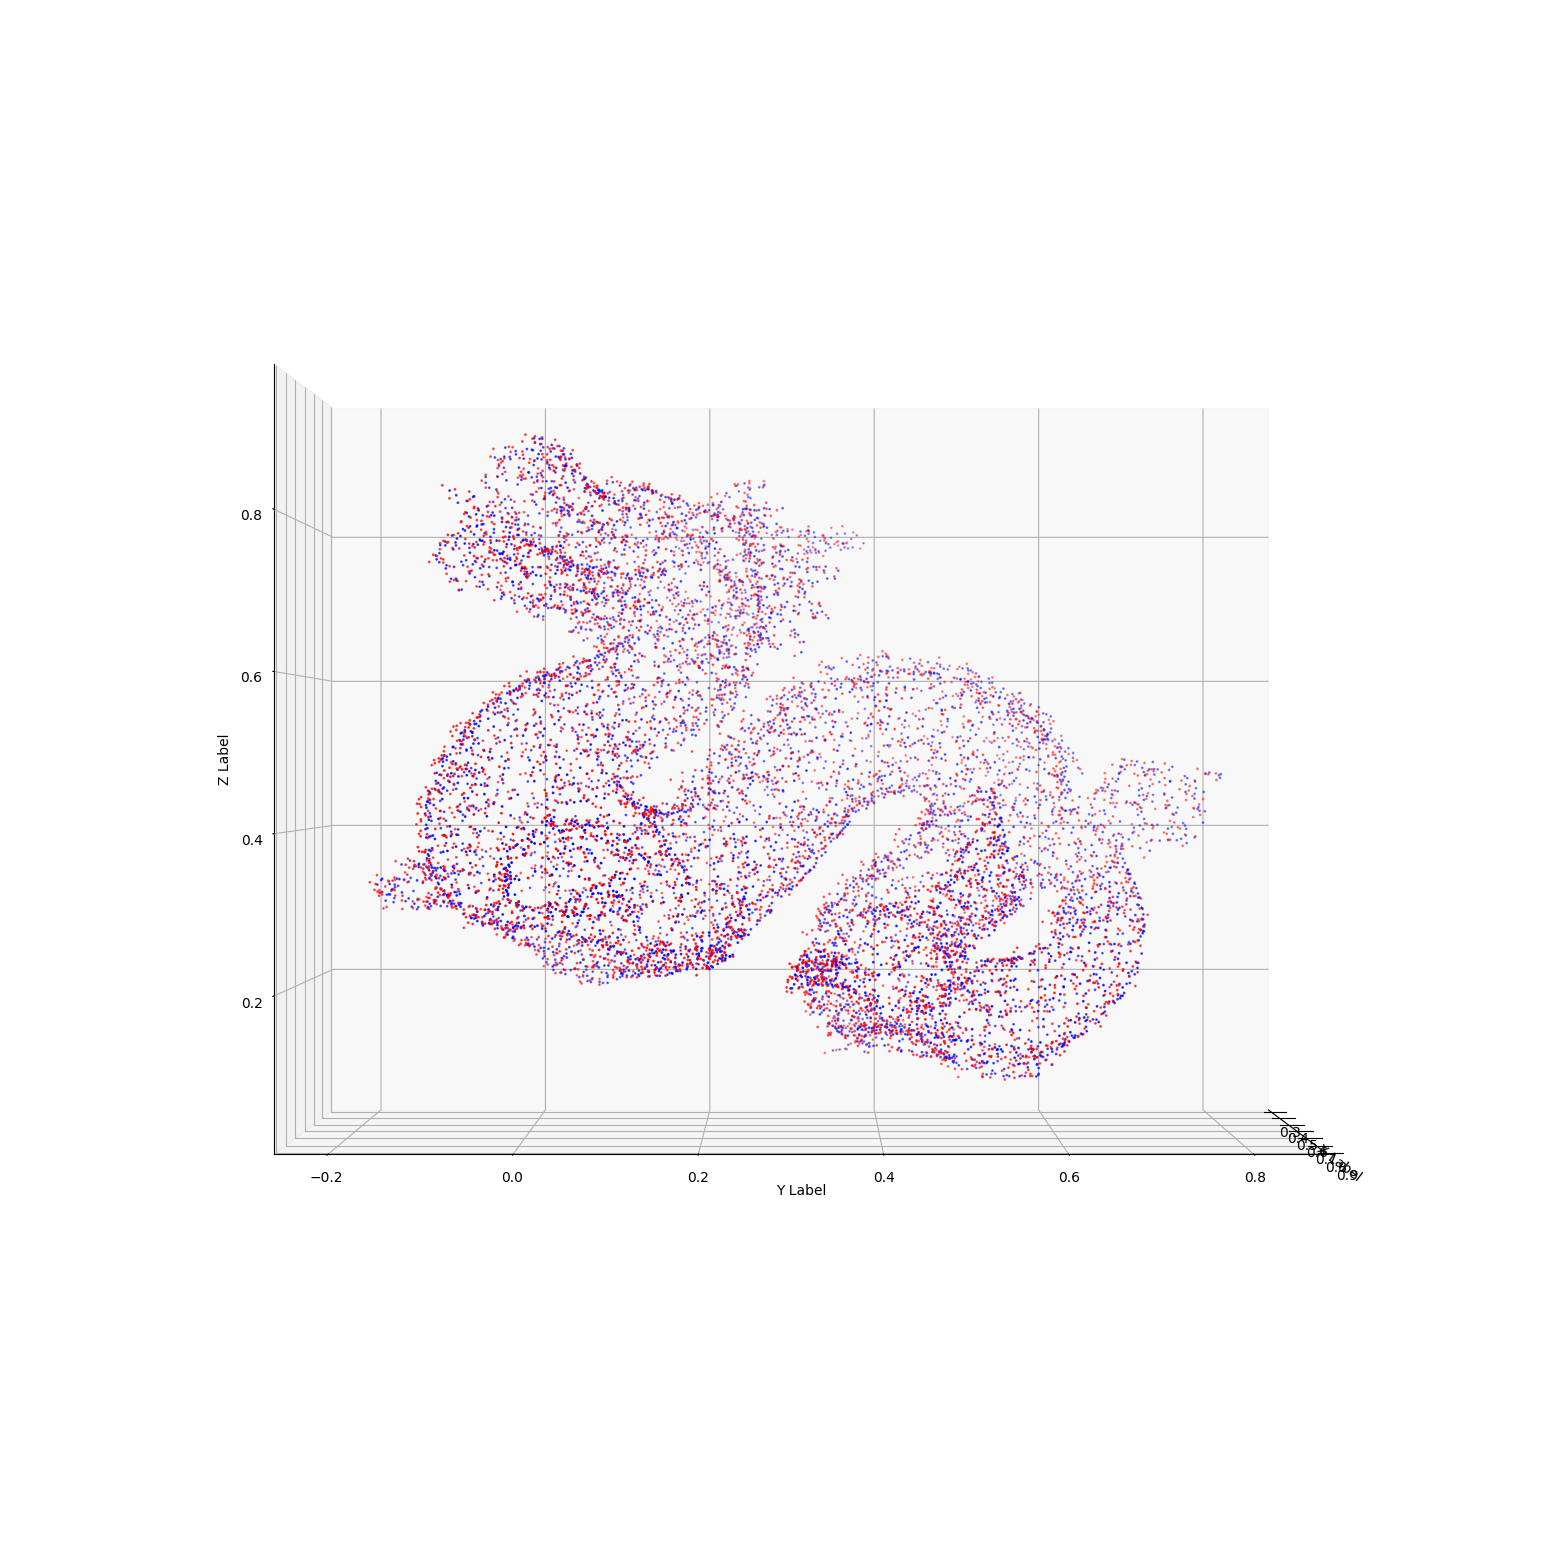

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')

newPoints = []

pointCloudX = np.loadtxt("pclX.txt")
pointCloudY = np.loadtxt("pclY.txt")

for point in pointCloudX:
    newPoint = R.dot(point.T) + t
    newPoints.append(newPoint)

dataframeY = pd.DataFrame(pointCloudY, columns=["x","y","z"])
dataframeNewX = pd.DataFrame(newPoints, columns=["x","y","z"])
dataframeX = pd.DataFrame(pointCloudX, columns=["x","y","z"])

ax.scatter3D(dataframeY["x"], dataframeY["y"], dataframeY["z"], c='r', s=1)
ax.scatter3D(dataframeNewX["x"], dataframeNewX["y"], dataframeNewX["z"],c='b', s=1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(0,0)

In [51]:
size = len(C)
rmseSum = 0

for pair in C:
    xTransformation = np.matmul(R,pointCloudX[pair[0]]) + t
    rmseSum += (np.linalg.norm(pointCloudY[pair[1]] - xTransformation))**2

RMSE = (rmseSum/size)**0.5
RMSE

0.008950576587683124